<a href="https://colab.research.google.com/github/bandiamithsreenivasareddy/ml-lab/blob/main/MLlab2_23104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Lab Session Data.xlsx to Lab Session Data (1).xlsx


A1. Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data
and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following
activities.
• What is the dimensionality of the vector space for this data?
• How many vectors exist in this vector space?
• What is the rank of Matrix A?
• Using Pseudo-Inverse find the cost of each product available for sale.  
(Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a
pseudo-inverse.)
A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
available with the vendor.
A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
purchase behavior.

In [3]:
import pandas as pd
import numpy as np
df = pd.read_excel(r'/content/Lab Session Data.xlsx', sheet_name="Purchase data")
df = df.iloc[:, :5] #if we use iloc then column name will not be issue
print(df)

A = df.iloc[:10, 1:4].values
print(f"A:{A}")
C = df.iloc[:10, 4].values.reshape(-1, 1)
print(f"C:{C}")

print(f"Dimensionality of the vector space:{df.shape}")

print(f"Number of vectors:{df.shape[0]}")

rank_A = np.linalg.matrix_rank(A)
print(f"Rank of matrix A: {rank_A}")

A_pinv = np.linalg.pinv(A)
print(f"pinv of A is {A_pinv}")

X = np.dot(A_pinv, C)
print(f"model vector X is {X}")
print(f" Cost of each candy is Rs. {X[0]}")
print(f" Cost of each mango is Rs. {X[1]}")
print(f" Cost of each milk packet is Rs. {X[2]}")

category = []
for payment in df['Payment (Rs)']:
  if payment>=200 :
    category.append('Rich')
  else:
    category.append('Poor')
df['category']= category
print(df)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198
A:[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
C:[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Dimensionality of the vector space

A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the
following after loading the data to your programming platform.
• Calculate the mean and variance of the Price data present in column D.  
(Suggestion: if you use Python, you may use statistics.mean() &
statistics.variance() methods).
• Select the price data for all Wednesdays and calculate the sample mean. Compare the mean
with the population mean and note your observations.
• Select the price data for the month of Apr and calculate the sample mean. Compare the
mean with the population mean and note your observations.
• From the Chg% (available in column I) find the probability of making a loss over the stock.
(Suggestion: use lambda function to find negative values)
• Calculate the probability of making a profit on Wednesday.
• Calculate the conditional probability of making profit, given that today is Wednesday.
• Make a scatter plot of Chg% data against the day of the week

             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

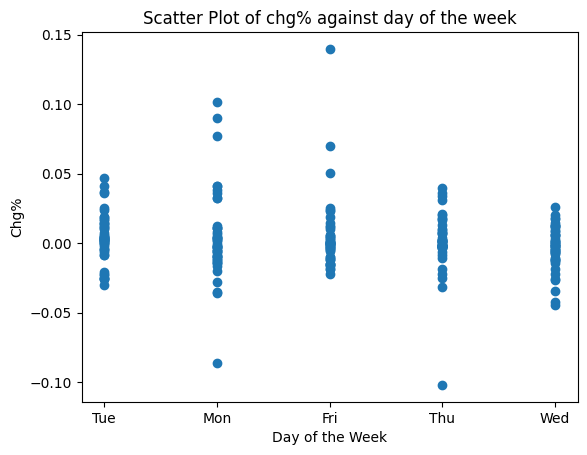

In [4]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

df = pd.read_excel(r'/content/Lab Session Data.xlsx', sheet_name="IRCTC Stock Price")
df = df.iloc[:, :9]
print(df)

mean = statistics.mean(df["Price"])
var = statistics.variance(df["Price"])
print(f"Price Mean: {mean}")
print(f"Price Variance: {var}")

wed_mean = df.loc[df['Day'] == 'Wed', 'Price'].mean()
print(f"Mean Price on Wednesdays: {wed_mean}")
print("Observation: Sales at IRCTC are lower on Wednesdays compared to the overall average.")

apr_mean = df.loc[df['Month'] == 'Apr', 'Price'].mean()
print(f"Mean Price in April: {apr_mean}")
print("Observation: Sales at IRCTC are higher in April compared to the overall average.")

loss_probability = sum(df['Chg%'] < 0) / len(df)
print(f"Probability of making a loss: {loss_probability}")

wed_df = df[df['Day'] == 'Wed']
wed_profit = sum(wed_df['Chg%'] > 0) / len(wed_df)
print(f"Probability of making a profit on Wednesday: {wed_profit}")

profit_given_wed = (sum((df['Day'] == 'Wed') & (df['Chg%'] > 0)) / sum(df['Day'] == 'Wed'))
print(f"Conditional Probability (Profit | Wednesday): {profit_given_wed}")

days = df['Day']
chg = df['Chg%']
plt.scatter(days,chg)
plt.xlabel("Day of the Week")
plt.ylabel("Chg%")
plt.title("Scatter Plot of chg% against day of the week")
plt.show()

A5. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the
following tasks:
• Study each attribute and associated values present. Identify the datatype (nominal etc.)
for the attribute.
• For categorical attributes, identify the encoding scheme to be employed. (Guidance:
employ label encoding for ordinal variables while One-Hot encoding may be employed
for nominal variables).
• Study the data range for numeric variables.
• Study the presence of missing values in each attribute.
• Study presence of outliers in data.  
• For numeric variables, calculate the mean and variance (or standard deviation).
A6. Data Imputation: employ appropriate central tendencies to fill the missing values in the data
variables. Employ following guidance.
• Mean may be used when the attribute is numeric with no outliers
• Median may be employed for attributes which are numeric and contain outliers
• Mode may be employed for categorical attributes
A7. Data Normalization / Scaling: from the data study, identify the attributes which may need
normalization. Employ appropriate normalization techniques to create normalized set of data.
A8. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors.
Use first vector for each document for this. Compare the values for JC and SMC and judge the
appropriateness of each of them.
JC = (f11) / (f01+ f10+ f11)
SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
f11= number of attributes where the attribute carries value of 1 in both
the vectors.
A9. Cosine Similarity Measure: Now take the complete vectors for these two observations (including
all the attributes). Calculate the Cosine similarity between the documents by using the second
feature vector for each document.
A10. Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS
between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient
calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.  

<ipython-input-5-2682b6ed1284>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


Attribute Data Types:
Record ID: Ratio
age: Ratio
sex: Ordinal
on thyroxine: Ordinal
query on thyroxine: Ordinal
on antithyroid medication: Ordinal
sick: Ordinal
pregnant: Ordinal
thyroid surgery: Ordinal
I131 treatment: Ordinal
query hypothyroid: Ordinal
query hyperthyroid: Ordinal
lithium: Ordinal
goitre: Ordinal
tumor: Ordinal
hypopituitary: Ordinal
psych: Ordinal
TSH measured: Ordinal
TSH: Ratio
T3 measured: Ordinal
T3: Ratio
TT4 measured: Ordinal
TT4: Ratio
T4U measured: Ordinal
T4U: Ratio
FTI measured: Ordinal
FTI: Ratio
TBG measured: Ordinal
TBG: Ratio
referral source: Ordinal
Condition: Nominal
Encoding Scheme:
sex: Label Encoding (Ordinal)
on thyroxine: Label Encoding (Ordinal)
query on thyroxine: Label Encoding (Ordinal)
on antithyroid medication: Label Encoding (Ordinal)
sick: Label Encoding (Ordinal)
pregnant: Label Encoding (Ordinal)
thyroid surgery: Label Encoding (Ordinal)
I131 treatment: Label Encoding (Ordinal)
query hypothyroid: Label Encoding (Ordinal)
query hyperthy

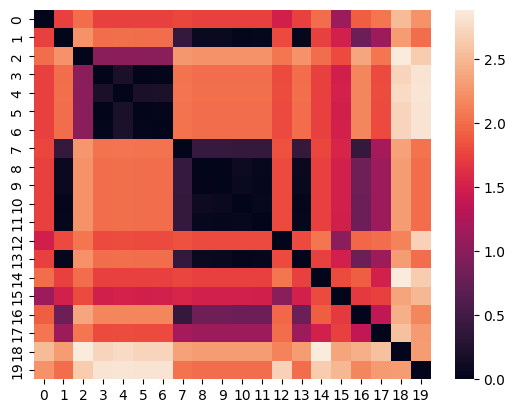

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_excel(r"/content/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
# Replace '?' with NaN and infer proper datatypes
df.replace('?', np.nan, inplace=True)
df = df.infer_objects()

data_types = {}
# Identify and classify data types: Nominal, Ordinal, Ratio, Interval
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].nunique() <= 10:
            data_types[col] = 'Ordinal'
        else:
            data_types[col] = 'Nominal'
    elif df[col].dtype in ['int64', 'float64']:
        if df[col].min() >= 0:
            data_types[col] = 'Ratio'
        else:
            data_types[col] = 'Interval'
print("Attribute Data Types:")
for col, dtype in data_types.items():
    print(f"{col}: {dtype}")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encoding Scheme
print("Encoding Scheme:")
for col in categorical_cols:
    if data_types[col] == 'Ordinal':
        print(f"{col}: Label Encoding (Ordinal)")
    else:
        print(f"{col}: One-Hot Encoding (Nominal)")

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Range for Numeric Variables:")
for col in numerical_cols:
    min_value = df[col].min()
    max_value = df[col].max()
    data_range = max_value - min_value
    print(f"{col}: Min = {min_value}, Max = {max_value}, Range = {data_range}")
print("Mean and Standard Deviation (or Variance) for Numeric Variables:")
for col in numerical_cols:
    mean_value = df[col].mean()
    std_dev = df[col].std()
    variance = std_dev ** 2
    print(f"{col}: Mean = {mean_value:.2f}, Standard Deviation = {std_dev}, Variance = {variance}")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:", missing_values)

# Apply Label Encoding to categorical features
for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = LabelEncoder().fit_transform(df[col])

# Identify outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:", outliers)

# Data Imputation
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        if outliers[col] > 0:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
print("Missing values after imputation:", df.isnull().sum())

#Data Normalization
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Normalized Data Sample:", df.head())

# jc,smc
vector1 = df.iloc[0, :].values
vector2 = df.iloc[1, :].values
f11 = np.sum((vector1 == 1) & (vector2 == 1))
f00 = np.sum((vector1 == 0) & (vector2 == 0))
f10 = np.sum((vector1 == 1) & (vector2 == 0))
f01 = np.sum((vector1 == 0) & (vector2 == 1))
if (f01 + f10 + f11) != 0:
    jc = f11 / (f01 + f10 + f11)
else:
    jc = 0
if (f00 + f01 + f10 + f11) != 0:
    smc = (f11 + f00) / (f00 + f01 + f10 + f11)
else:
    smc = 0
print(f"Jaccard Coefficient: {jc}, SMC: {smc}")

# Cosine Similarity
vector1 = df.iloc[0, :].values.reshape(1, -1)
vector2 = df.iloc[1, :].values.reshape(1, -1)
cosine_sim = cosine_similarity(vector1, vector2)[0][0]
print(f"Cosine Similarity: {cosine_sim}")

# Heatmap plot
df_subset = df.iloc[:20, :]
similarity_matrix = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        if i != j:
            similarity_matrix[i, j] = np.linalg.norm(df_subset.iloc[i] - df_subset.iloc[j])
sns.heatmap(similarity_matrix)
plt.show()

In [6]:
!jupyter nbconvert --to pdf MLlab2_23103.ipynb


[NbConvertApp] WARNING | pattern 'MLlab2_23103.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
  